in this video, I want to introduce graph Convolution Network which is basically convolution like you've seen for images
bur for graphs, actually 

In [1]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

--2022-03-22 16:42:40--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2022-03-22 16:42:40--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75660608 (72M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  72.16M  4.38MB/s    in 9.5s    

2022-03-22 16:42:50 (7.61 MB/s) - ‘Miniconda3-latest-Linu

In [2]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

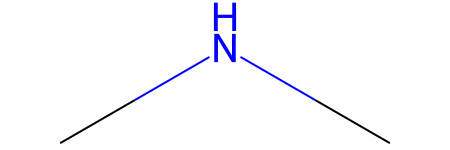

In [3]:
mol=Chem.MolFromSmiles('CNC')
mol

In [6]:
def label(mol):
    for i,at in enumerate(mol.GetAtoms()):
        lbl=str(i)
        at.SetProp('atomLabel',lbl)
    return mol   

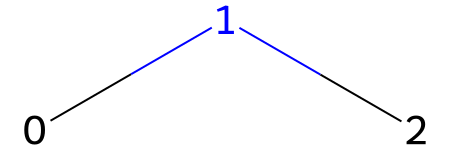

In [8]:
A=Chem.GetAdjacencyMatrix(mol)
label(mol)

In [9]:
A=Chem.GetAdjacencyMatrix(mol)
A

array([[0, 1, 0],
       [1, 0, 1],
       [0, 1, 0]], dtype=int32)

In [11]:
A=np.asmatrix(A)
A

matrix([[0, 1, 0],
        [1, 0, 1],
        [0, 1, 0]], dtype=int32)

In [12]:
C=[1,0]
N=[0,1]
X=np.array([C,N,C])
X

array([[1, 0],
       [0, 1],
       [1, 0]])

...C N  
 C 0 1  
 N 2 0  
 C 0 1  
 atom 0 is bound to 1 N and 0 C  
 atom 1 is bound to 2 C and 0 N  
 atom 2 is bound to 1 N and 0 C

In [13]:
A @ X

matrix([[0, 1],
        [2, 0],
        [0, 1]])

In [14]:
I=np.matrix(np.eye(A.shape[0]))
I

matrix([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [15]:
A_hat=A+I
A_hat

matrix([[1., 1., 0.],
        [1., 1., 1.],
        [0., 1., 1.]])

...C N  
 C 0 1  
 N 2 0  
 C 0 1  
 atom 0 is bound to 1 N and 0 C and is a A  
 atom 1 is bound to 2 C and 0 N and is a N  
 atom 2 is bound to 1 N and 0 C and is a C  

In [16]:
A_hat * X

matrix([[1., 1.],
        [2., 1.],
        [1., 1.]])

we want to take this and put it into a diagonal matrix so a matrix here and we're gonna use the diagnal function to put it in diagonal form

In [17]:
D_hat=np.array(np.sum(A_hat,axis=0))[0]
D_hat

array([2., 3., 2.])

In [18]:
D_hat=np.matrix(np.diag(D_hat))
D_hat

matrix([[2., 0., 0.],
        [0., 3., 0.],
        [0., 0., 2.]])

In [26]:
D_hat_inv=np.sqrt(D_hat**-1)
H=D_hat_inv * A_hat * D_hat_inv * X

In [22]:
import numpy as np

In [25]:
np.random.seed(0)
W=2*np.random.rand(2,5)-1 #number of descriptors x number of filter
W=np.asmatrix(W)
W

matrix([[ 0.09762701,  0.43037873,  0.20552675,  0.08976637, -0.1526904 ],
        [ 0.29178823, -0.12482558,  0.783546  ,  0.92732552, -0.23311696]])

In [27]:
Z=H*W
Z

matrix([[ 0.16793555,  0.16422954,  0.42264469,  0.42346224, -0.1715148 ],
        [ 0.17697486,  0.30979424,  0.42899389,  0.38240244, -0.20237684],
        [ 0.16793555,  0.16422954,  0.42264469,  0.42346224, -0.1715148 ]])

In [28]:
def relu(x):
    return np.maximum(0,x)

In [29]:
relu(Z)

matrix([[0.16793555, 0.16422954, 0.42264469, 0.42346224, 0.        ],
        [0.17697486, 0.30979424, 0.42899389, 0.38240244, 0.        ],
        [0.16793555, 0.16422954, 0.42264469, 0.42346224, 0.        ]])

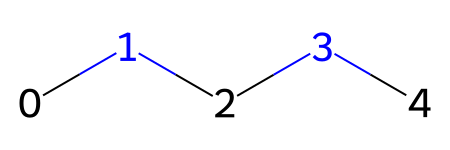

In [30]:
mol2=Chem.MolFromSmiles('CNCNC')
label(mol2)

In [31]:
A=Chem.GetAdjacencyMatrix(mol2)
A=np.asmatrix(A)

C=[1,0]
N=[0,1]
X=np.array([C,N,C,N,C])

H1=A * X 

print(H1)

H2 = A * H1
print(H2)

[[0 1]
 [2 0]
 [0 2]
 [2 0]
 [0 1]]
[[2 0]
 [0 3]
 [4 0]
 [0 3]
 [2 0]]
